The goal of this project is to build a model that can detect whether a person is wearing a mask or not. We will be downloading the data from kaggle and then building our model .

## Getting the Data

We start by getting the data. The data that we want is on kaggle and you can access it through this link: https://www.kaggle.com/omkargurav/face-mask-dataset 

In [ ]:
import os

In [ ]:
! pip install -q kaggle
from google.colab import drive

# mount your Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.environ['KAGGLE_USERNAME']='x'         #kaggle username
os.environ['KAGGLE_KEY']='4873647'  # kaggle password

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:07<00:00, 23.4MB/s]
100% 163M/163M [00:07<00:00, 22.2MB/s]


Once the dataset is downloaded, it is going to be zipped, and in order to use it, you need to unzip it. Here you have the option of unzipping it in the environment or in your google drive.

In [ ]:
#uploading the data

from zipfile import ZipFile

file_name='/content/face-mask-dataset.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


## Importing the Libraries

Now, it is time to import the libraries that we need.

In [ ]:
import os
import shutil
import random
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2

If we look at the data that we extracted, we can see that it is located in 2 folders: with_mask and without_mask. What we need to do now, is to create a hierarchy of folders that would help us specify the training, validation, and testing data. In order to do this we will use the **os** and the **shutil** libraries that would help us creating folders, and moving images from a folder to another. In simple terms, the libraries helps us perform the same things that you do on your computer with your operating system, but in a programmatic way.

The initial dataset contains a lot of images belonging to the 2 classes, what we will do is randomly sample from this dataset so that we reduce the training and the tuning time.

We need to have in our final directories the following:
* Training: 500 images "with_mask", and 500 images "without_mask"
* Validation: 100 images "with_mask", and 100 images "without_mask"
* Testing: 50 images "with_mask", and 50 images "without_mask"

In [ ]:
import os
import random
import shutil

# Directory paths
source_directory_with_mask = '/content/data/with_mask'
source_directory_without_mask = '/content/data/without_mask'
target_directory = '/content/data/new_dir'

# Create the target directory if it doesn't exist
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# Define the subdirectories for training, validation, and testing
subdirectories = ['training', 'validation', 'testing']

# Create the subdirectories within the target directory
for subdir in subdirectories:
    subdir_path = os.path.join(target_directory, subdir)
    os.makedirs(subdir_path)
    for class_name in ['with_mask', 'without_mask']:
        class_path = os.path.join(subdir_path, class_name)
        os.makedirs(class_path)

# Function to move images from source to target directory
def move_images(source_folder, target_folder, num_images):
    image_files = os.listdir(source_folder)
    random.shuffle(image_files)
    for image_file in image_files[:num_images]:
        source_path = os.path.join(source_folder, image_file)
        target_path = os.path.join(target_folder, image_file)
        shutil.move(source_path, target_path)

# Move images to the training directory
move_images(source_directory_with_mask, os.path.join(target_directory, 'training/with_mask'), 500)
move_images(source_directory_without_mask, os.path.join(target_directory, 'training/without_mask'), 500)

# Move images to the validation directory
move_images(source_directory_with_mask, os.path.join(target_directory, 'validation/with_mask'), 100)
move_images(source_directory_without_mask, os.path.join(target_directory, 'validation/without_mask'), 100)

# Move images to the testing directory
move_images(source_directory_with_mask, os.path.join(target_directory, 'testing/with_mask'), 50)
move_images(source_directory_without_mask, os.path.join(target_directory, 'testing/without_mask'), 50)


## Inspecting the Dataset

Now we will see some characteristics of our dataset.

Define 3 variables: **training_path**, **validation_path**, and **testing_path** so that you can use them for the rest of the colab.

In [ ]:
training_path ='/content/data/new_dir/training'
validation_path ='/content/data/new_dir/validation'
testing_path ='/content/data/new_dir/testing'

To make sure that everythinh went correctly,we will write a code that counts the number of images that we have in our training directory for each of the 2 categories: with_mask and without_mask

In [ ]:
with_mask_dir = os.path.join(training_path, 'with_mask')
without_mask_dir = os.path.join(training_path, 'without_mask')

# Count images with mask
num_with_mask = len(os.listdir(with_mask_dir))

# Count images without mask
num_without_mask = len(os.listdir(without_mask_dir))

# Print the results
print("Number of images with mask:", num_with_mask)
print("Number of images without mask:", num_without_mask)

Number of images with mask: 500
Number of images without mask: 500


Do the same for the validation and the testing folders

In [ ]:
with_mask_dir = os.path.join(testing_path, 'with_mask')
without_mask_dir = os.path.join(testing_path, 'without_mask')

# Count images with mask
num_with_mask = len(os.listdir(with_mask_dir))

# Count images without mask
num_without_mask = len(os.listdir(without_mask_dir))

# Print the results
print("Number of images with mask:", num_with_mask)
print("Number of images without mask:", num_without_mask)

Number of images with mask: 50
Number of images without mask: 50


In [ ]:
with_mask_dir = os.path.join(validation_path, 'with_mask')
without_mask_dir = os.path.join(validation_path, 'without_mask')

# Count images with mask
num_with_mask = len(os.listdir(with_mask_dir))

# Count images without mask
num_without_mask = len(os.listdir(without_mask_dir))

# Print the results
print("Number of images with mask:", num_with_mask)
print("Number of images without mask:", num_without_mask)

Number of images with mask: 100
Number of images without mask: 100


Write a code that shows 5 random images for people with mask from your training set.

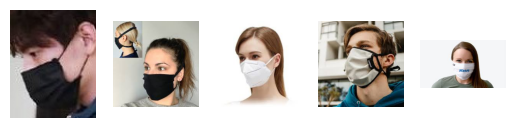

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

path = '/content/data/new_dir/training/with_mask'
with_mask_images = glob.glob(os.path.join(path, 'with_mask_*.jpg'))

# Shuffle the list of images
random.shuffle(with_mask_images)

num_images_to_display = 5

# Display random images with masks
for i in range(num_images_to_display):
    # Check if there are enough images to display
    if i >= len(with_mask_images):
        break

    image_path = with_mask_images[i]
    img = mpimg.imread(image_path)

    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.show()


Do the same for people without mask.

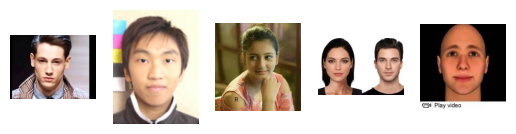

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

path = '/content/data/new_dir/training/without_mask'
with_mask_images = glob.glob(os.path.join(path, 'without_mask_*.jpg'))

# Shuffle the list of images
random.shuffle(with_mask_images)

num_images_to_display = 5

# Display random images with masks
for i in range(num_images_to_display):
    # Check if there are enough images to display
    if i >= len(with_mask_images):
        break

    image_path = with_mask_images[i]
    img = mpimg.imread(image_path)

    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.show()


In [ ]:
import imghdr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img , img_to_array , ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Conv2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from os import listdir
from keras.callbacks import EarlyStopping
import PIL
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
from os import listdir
C = sorted(listdir(training_path))
C

['with_mask', 'without_mask']

In [ ]:
# Define data normalization settings for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

# Define data normalization settings for validation and testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up data generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    training_path,
    classes=C,
    target_size=(224,224),
    batch_size=10,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_path,
    target_size=(224,224),
    classes=C,
    batch_size=10,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    testing_path,
    target_size=(224,224),
    batch_size=10,
    classes=C,
    class_mode='binary',
    shuffle=False                   ## Shuffle = False is important because we want to compare the predicted labels to the actual labels later on
)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
print(test_generator.class_indices)

{'with_mask': 0, 'without_mask': 1}


## Modeling

Define a model structure that can deal with the images that we have to classify them between the 2 classes.

In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(96, (3, 3), padding='same', activation='relu', input_shape=(224,224, 3)),
    layers.BatchNormalization(),
    layers.Dropout(0.7),

    layers.Conv2D(96, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.7),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 96)      2688      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 96)     384       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 224, 224, 96)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 96)      83040     
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 96)     384       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 96)     0

Train the model that we defined on the training data and evaluate it on the validation data..

In [ ]:
BATCH_SIZE=10
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, mode='min')
history = model.fit(
    train_generator,
    epochs=25,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[early_stop],
    verbose=True
)

Epoch 1/25
100/100 [==============================] - 26s 258ms/step - loss: 0.1884 - accuracy: 0.9260 - val_loss: 0.3309 - val_accuracy: 0.8900
Epoch 2/25
100/100 [==============================] - 25s 249ms/step - loss: 0.1748 - accuracy: 0.9260 - val_loss: 0.4905 - val_accuracy: 0.8050
Epoch 3/25
100/100 [==============================] - 25s 247ms/step - loss: 0.1511 - accuracy: 0.9450 - val_loss: 0.3713 - val_accuracy: 0.8800
Epoch 4/25
100/100 [==============================] - 25s 248ms/step - loss: 0.1115 - accuracy: 0.9620 - val_loss: 0.4459 - val_accuracy: 0.8450
Epoch 5/25
100/100 [==============================] - 26s 255ms/step - loss: 0.1329 - accuracy: 0.9570 - val_loss: 0.3292 - val_accuracy: 0.8850
Epoch 6/25
100/100 [==============================] - 25s 247ms/step - loss: 0.1978 - accuracy: 0.9180 - val_loss: 0.4259 - val_accuracy: 0.8450
Epoch 7/25
100/100 [==============================] - 25s 248ms/step - loss: 0.1410 - accuracy: 0.9470 - val_loss: 0.5316 - val_ac

Plot the accuracy curve and see if our model is overfitting.

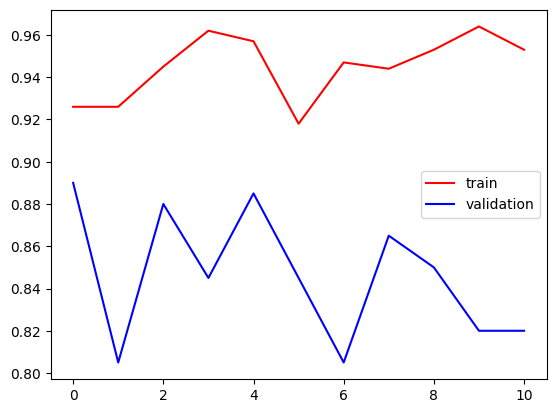

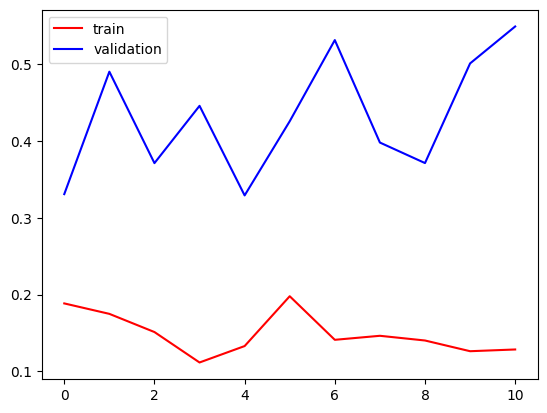

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Filter values less than 1
train_loss_filtered = [loss for loss in train_loss if loss < 3]
val_loss_filtered = [loss for loss in val_loss if loss < 3]

# Plot filtered loss values
plt.plot(train_loss_filtered, color='red', label='train')
plt.plot(val_loss_filtered, color='blue', label='validation')
plt.legend()
plt.show()

[The model is overfitting the training accuracy is higher than the validation accuracy and the validation loss is higher than the training loss]

## Evaluate the model


Now we will evaluate the model that we built on the testing set .

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("Loss:", loss)
print("Accuracy:", accuracy)

10/10 [==============================] - 1s 55ms/step - loss: 0.2805 - accuracy: 0.8900
Loss: 0.28045886754989624
Accuracy: 0.8899999856948853


Now we want to visualize the confusion matrix in order to see how much our classifier is good in predicting different classes.

In [ ]:
predictions = model.predict(test_generator)

# Apply a threshold to the predicted probabilities
threshold = 0.5  # Modify the threshold as needed
y_pred = [1 if prediction >= threshold else 0 for prediction in predictions]

print(y_pred)

10/10 [==============================] - 1s 55ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
true_classes = test_generator.classes  #Test generator labels
print(true_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


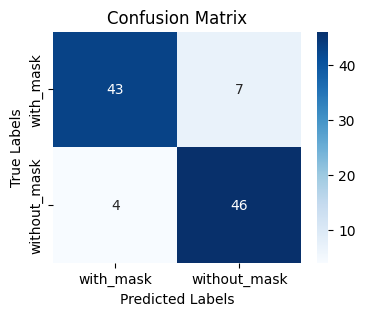

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, y_pred)

# Get the class labels from the data generator
class_labels = list(test_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

   with_mask       0.91      0.86      0.89        50
without_mask       0.87      0.92      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(true_classes, y_pred)
recall = recall_score(true_classes, y_pred)
f1 = f1_score(true_classes, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8679245283018868
Recall: 0.92
F1 Score: 0.8932038834951457


## Error Analysis

Now we need to see for each of the images that we have in our testing set, what did the model predict. This helps us analyze the errors and try to think why the model predicted some things in the wrong way.

In [ ]:
# Assigning label names to the corresponding indexes
labels = {
    0: 'with_mask',
    1: 'without_mask',
}

# Loading images and their predictions
prediction = []
original = []
image = []

for folder in os.listdir(testing_path):
    for item in os.listdir(os.path.join(testing_path, folder)):
        # Code to open the image
        img = PIL.Image.open(os.path.join(testing_path, folder, item))
        # Resizing the image to (224, 224)
        img = img.resize((224, 224))
        # Appending image to the image list
        image.append(img)
        # Converting image to array
        img_array = np.asarray(img, dtype=np.float32)
        # Normalizing the image
        img_array /= 255.0
        # Reshaping the image to a 4D array
        img_array = img_array.reshape(1, 224, 224, 3)
        # Making prediction of the model
        predictions = model.predict(img_array)
        threshold = 0.5  # Modify the threshold as needed
        y_pred1 = [1 if prediction >= threshold else 0 for prediction in predictions]
        # Appending the predicted class to the list
        prediction.append(labels[y_pred1[0]])
        # Appending the original class to the list
        original.append(folder)


1/1 [==============================] - 0s 21ms/step


In [ ]:
fig, axes = plt.subplots(len(image), 2, figsize=(10, 200))
for i, ax in enumerate(axes):
    ax[0].imshow(image[i])
    ax[0].axis('off')
    ax[0].set_title("Image")

    ax[1].axis('off')
    ax[1].text(0.5, 0.5, "True: " + original[i] + "\nPredicted: " + prediction[i], fontsize=12, ha='center')

plt.tight_layout()
plt.show()

**Try to derive some conclusions from the wrong predictions that your model has made. Meaning: why do you think these predictions were wrong?**

[There are many reasons why the predictions are wrong : 1: The model is overfitting , 2 : We don't have enough training data, we only have 1000 training images (500 for each class) , 3: The 2 classes are similar they both represent human faces in both categories (They both have  ears , eyes , hair , shape of face ...) so the features extracted from the input images may not be discriminative enough to differentiate between the two classes thats why we the model have difficulties differentiating between with_mask and without_mask.]

**Think of a way that you can use in order to improve the performance of your model, and implement it**

[Data Augmentation]

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=.05,
    height_shift_range=.05,
    horizontal_flip=True,
    zoom_range=0.3
)

# For test data we only rescale the data.
# Never augment test data!!!
test_datagen = ImageDataGenerator(rescale=1./255)


# Train generator
train_generator = train_datagen.flow_from_directory(
    training_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    testing_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'with_mask': 0, 'without_mask': 1}

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=3, strides=1, activation="relu", input_shape=(224, 224, 3)))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, activation="relu"))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

model.add(Conv2D(filters=512, kernel_size=3, strides=1, activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

model.add(Flatten())

model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["binary_accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 128)     73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                  

In [ ]:
BATCH_SIZE=32
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, mode='min')
history = model.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[early_stop],
    verbose=True
)

Epoch 1/50
31/31 [==============================] - ETA: 0s - loss: 0.7175 - binary_accuracy: 0.5517

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


31/31 [==============================] - 32s 683ms/step - loss: 0.7175 - binary_accuracy: 0.5517 - val_loss: 0.6740 - val_binary_accuracy: 0.5990
Epoch 2/50
31/31 [==============================] - 17s 539ms/step - loss: 0.6249 - binary_accuracy: 0.6890 - val_loss: 0.4581 - val_binary_accuracy: 0.8438
Epoch 3/50
31/31 [==============================] - 19s 625ms/step - loss: 0.4431 - binary_accuracy: 0.8068 - val_loss: 0.3818 - val_binary_accuracy: 0.8281
Epoch 4/50
31/31 [==============================] - 16s 515ms/step - loss: 0.3624 - binary_accuracy: 0.8574 - val_loss: 0.3646 - val_binary_accuracy: 0.8333
Epoch 5/50
31/31 [==============================] - 16s 526ms/step - loss: 0.3504 - binary_accuracy: 0.8458 - val_loss: 0.3643 - val_binary_accuracy: 0.8594
Epoch 6/50
31/31 [==============================] - 21s 679ms/step - loss: 0.3533 - binary_accuracy: 0.8574 - val_loss: 0.3419 - val_binary_accuracy: 0.8542
Epoch 7/50
31/31 [==============================] - 17s 546ms/step - 

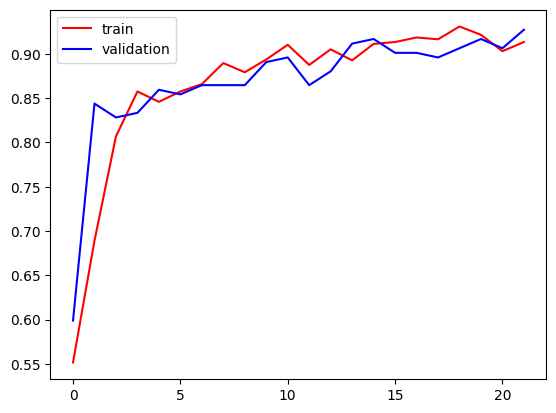

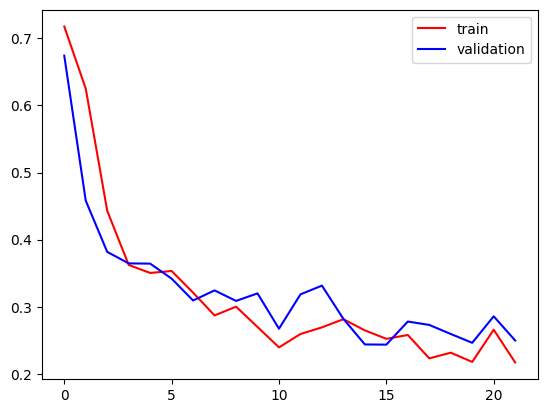

In [ ]:
plt.plot(history.history['binary_accuracy'],color='red',label='train')
plt.plot(history.history['val_binary_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("Loss:", loss)
print("Accuracy:", accuracy)

4/4 [==============================] - 1s 341ms/step - loss: 0.2306 - binary_accuracy: 0.9000
Loss: 0.2305750846862793
Accuracy: 0.8999999761581421


As we can see our testing accuracy increased after we did data augmentation.There is no overfitting.

In [ ]:
predictions = model.predict(test_generator)

# Apply a threshold to the predicted probabilities
threshold = 0.5  # Modify the threshold as needed
y_pred = [1 if prediction >= threshold else 0 for prediction in predictions]

print(y_pred)

4/4 [==============================] - 1s 148ms/step
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
true_classes = test_generator.classes
print(true_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

   with_mask       0.93      0.86      0.90        50
without_mask       0.87      0.94      0.90        50

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [ ]:
class_labels = list(test_generator.class_indices.keys())
class_labels

['with_mask', 'without_mask']

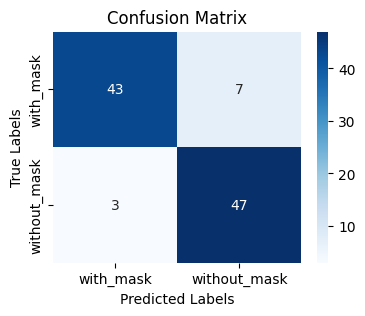

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, y_pred)

# Get the class labels from the data generator
class_labels = list(test_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


We only have 10 missclassified images

### We can try to further improve our model using keras tuner for hyperparameter tuning

In [ ]:
pip install -U keras-tuner


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 7.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping

# Define the model-building function
def build_model2(hp):
    model = Sequential()

    model.add(Conv2D(filters=hp.Int('conv1_filters', min_value=64, max_value=128, step=32),
                     kernel_size=3, strides=1, activation='relu', input_shape=(224, 224, 3)))
    model.add(Conv2D(filters=hp.Int('conv2_filters', min_value=64, max_value=128, step=32),
                     kernel_size=3, strides=1, activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

    model.add(Conv2D(filters=128, kernel_size=3, strides=1, activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=3, strides=1, activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

    model.add(Conv2D(filters=256, kernel_size=3, strides=1, activation="relu"))
    model.add(Conv2D(filters=hp.Int('conv3_filters', min_value=256, max_value=512, step=128),
                     kernel_size=3, strides=1, activation='relu'))
    model.add(Conv2D(filters=hp.Int('conv4_filters', min_value=512, max_value=1024, step=256),
                     kernel_size=3, strides=1, activation='relu'))

    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

    model.add(Flatten())

    model.add(Dense(units=hp.Int('dense_units1', min_value=256, max_value=768, step=256), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout1', min_value=0.2, max_value=0.8, step=0.3)))
    model.add(Dense(units=hp.Int('dense_units2', min_value=512, max_value=1024, step=512), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout2', min_value=0.2, max_value=0.8, step=0.3)))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

    return model

# Define the tuner
tuner = RandomSearch(
    build_model2,
    objective='val_binary_accuracy',
    max_trials=12,
    executions_per_trial=1,
)

# Perform hyperparameter tuning
tuner.search(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks=[EarlyStopping(monitor='val_binary_accuracy', patience=4)]  # Add the early stopping callback to the fit function
)

# Get the best model and summary of the search
best_model = tuner.get_best_models(num_models=1)[0]

Trial 12 Complete [00h 02m 12s]
val_binary_accuracy: 0.5

Best val_binary_accuracy So Far: 0.925000011920929
Total elapsed time: 00h 38m 23s


In [ ]:
BATCH_SIZE =32
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

best_model.fit(
    train_generator,
    epochs=25,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping]  # Add the early stopping callback to the fit function
)

Epoch 1/25
31/31 [==============================] - 20s 639ms/step - loss: 0.1963 - binary_accuracy: 0.9215 - val_loss: 0.1300 - val_binary_accuracy: 0.9531
Epoch 2/25
31/31 [==============================] - 21s 676ms/step - loss: 0.2095 - binary_accuracy: 0.9287 - val_loss: 0.1488 - val_binary_accuracy: 0.9271
Epoch 3/25
31/31 [==============================] - 20s 637ms/step - loss: 0.1893 - binary_accuracy: 0.9236 - val_loss: 0.1461 - val_binary_accuracy: 0.9375
Epoch 4/25
31/31 [==============================] - 20s 646ms/step - loss: 0.2071 - binary_accuracy: 0.9184 - val_loss: 0.1742 - val_binary_accuracy: 0.9271
Epoch 5/25
31/31 [==============================] - 22s 709ms/step - loss: 0.1990 - binary_accuracy: 0.9246 - val_loss: 0.1393 - val_binary_accuracy: 0.9479
Epoch 6/25
31/31 [==============================] - 21s 659ms/step - loss: 0.1534 - binary_accuracy: 0.9401 - val_loss: 0.0974 - val_binary_accuracy: 0.9688
Epoch 7/25
31/31 [==============================] - 20s 64

In [ ]:
# Evaluate the best model on the test set
loss, accuracy = best_model.evaluate(test_generator)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


4/4 [==============================] - 1s 102ms/step - loss: 0.0925 - binary_accuracy: 0.9900


In [ ]:
predictions = best_model.predict(test_generator)

# Apply a threshold to the predicted probabilities
threshold = 0.5  # Modify the threshold as needed
y_pred = [1 if prediction >= threshold else 0 for prediction in predictions]

print(y_pred)

4/4 [==============================] - 1s 130ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


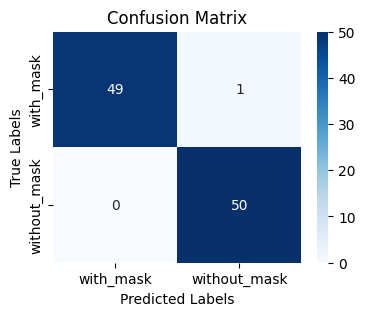

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, y_pred)

# Get the class labels from the data generator
class_labels = list(test_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Thats the best model that we got after data augmentation and hyperparameter tuning